### Import Source

In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv("valeursfoncieres-2023.txt",sep="|", low_memory=False)

### Supprimer colonnes NaN

In [2]:
df = df.dropna(axis = 1, how = 'all')

### Affichage

In [3]:
df.columns

Index(['No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'B/T/Q', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
       'Commune', 'Code departement', 'Code commune', 'Prefixe de section',
       'Section', 'No plan', 'No Volume', '1er lot',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Nombre de lots', 'Code type local', 'Type local',
       'Surface reelle bati', 'Nombre pieces principales', 'Nature culture',
       'Nature culture speciale', 'Surface terrain'],
      dtype='object')

In [4]:
print(df.head(10))

   No disposition Date mutation Nature mutation Valeur fonciere  No voie  \
0               1    05/01/2023           Vente      1070000,00    184.0   
1               1    05/01/2023           Vente      1070000,00    159.0   
2               1    05/01/2023           Vente      1070000,00    159.0   
3               1    03/01/2023           Vente       152200,00   2914.0   
4               1    05/01/2023           Vente       269000,00    427.0   
5               1    05/01/2023           Vente       269000,00    427.0   
6               1    05/01/2023           Vente       269000,00    427.0   
7               1    03/01/2023           Vente       770000,00    159.0   
8               1    06/01/2023           Vente         6820,00      NaN   
9               2    06/01/2023         Echange        10040,00      NaN   

  B/T/Q Type de voie Code voie                Voie  Code postal  ... 5eme lot  \
0   NaN          ALL      0124          DES HETRES       1630.0  ...      NaN   
1

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3727005 entries, 0 to 3727004
Data columns (total 35 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   No disposition              int64  
 1   Date mutation               object 
 2   Nature mutation             object 
 3   Valeur fonciere             object 
 4   No voie                     float64
 5   B/T/Q                       object 
 6   Type de voie                object 
 7   Code voie                   object 
 8   Voie                        object 
 9   Code postal                 float64
 10  Commune                     object 
 11  Code departement            object 
 12  Code commune                int64  
 13  Prefixe de section          float64
 14  Section                     object 
 15  No plan                     int64  
 16  No Volume                   object 
 17  1er lot                     object 
 18  Surface Carrez du 1er lot   object 
 19  2eme lot             

### Changement Types

In [6]:
# Changement Type Adresse
colonnes_to_convert = ['Code postal', 'Nombre pieces principales']

for column in colonnes_to_convert:
        df[column] = pd.to_numeric(df[column])

#Changement Type en int des codes N°
df = df.astype({
    'Code postal' : 'Int64',
    'Nombre pieces principales' :'Int64',
})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3727005 entries, 0 to 3727004
Data columns (total 35 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   No disposition              int64  
 1   Date mutation               object 
 2   Nature mutation             object 
 3   Valeur fonciere             object 
 4   No voie                     float64
 5   B/T/Q                       object 
 6   Type de voie                object 
 7   Code voie                   object 
 8   Voie                        object 
 9   Code postal                 Int64  
 10  Commune                     object 
 11  Code departement            object 
 12  Code commune                int64  
 13  Prefixe de section          float64
 14  Section                     object 
 15  No plan                     int64  
 16  No Volume                   object 
 17  1er lot                     object 
 18  Surface Carrez du 1er lot   object 
 19  2eme lot             

In [8]:
# Changement Type Valeur foncière
df["Valeur fonciere"] = pd.to_numeric(df['Valeur fonciere'].str.replace(',', '.'))

In [9]:
# Changement Type surfaces carrez des lots
colonnes_surfacecarrez = [
    'Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 
    'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 
    'Surface Carrez du 5eme lot'
]

for col in colonnes_surfacecarrez:
    df[col] = pd.to_numeric(df[col].str.replace(',', '.'))

In [10]:
df['Surface Carrez du 1er lot'] = df['Surface Carrez du 1er lot'].fillna(0)

# Filtrer les lignes où c'est différent de 0
df_filtre = df[df['Surface Carrez du 1er lot'] != 0]
print(df_filtre['Surface Carrez du 1er lot'])

62         20.10
63         76.94
64         76.94
99         13.00
100        53.00
           ...  
3726980    27.50
3726981    27.50
3726982    73.00
3726983    73.00
3726988    25.08
Name: Surface Carrez du 1er lot, Length: 330096, dtype: float64


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3727005 entries, 0 to 3727004
Data columns (total 35 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   No disposition              int64  
 1   Date mutation               object 
 2   Nature mutation             object 
 3   Valeur fonciere             float64
 4   No voie                     float64
 5   B/T/Q                       object 
 6   Type de voie                object 
 7   Code voie                   object 
 8   Voie                        object 
 9   Code postal                 Int64  
 10  Commune                     object 
 11  Code departement            object 
 12  Code commune                int64  
 13  Prefixe de section          float64
 14  Section                     object 
 15  No plan                     int64  
 16  No Volume                   object 
 17  1er lot                     object 
 18  Surface Carrez du 1er lot   float64
 19  2eme lot             

### Drop Colonnes

In [12]:
df.columns

Index(['No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'B/T/Q', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
       'Commune', 'Code departement', 'Code commune', 'Prefixe de section',
       'Section', 'No plan', 'No Volume', '1er lot',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Nombre de lots', 'Code type local', 'Type local',
       'Surface reelle bati', 'Nombre pieces principales', 'Nature culture',
       'Nature culture speciale', 'Surface terrain'],
      dtype='object')

In [13]:
print(df)

         No disposition Date mutation Nature mutation  Valeur fonciere  \
0                     1    05/01/2023           Vente        1070000.0   
1                     1    05/01/2023           Vente        1070000.0   
2                     1    05/01/2023           Vente        1070000.0   
3                     1    03/01/2023           Vente         152200.0   
4                     1    05/01/2023           Vente         269000.0   
...                 ...           ...             ...              ...   
3727000               1    05/10/2023    Adjudication        3931000.0   
3727001               1    05/10/2023    Adjudication        3931000.0   
3727002               1    05/10/2023    Adjudication        3931000.0   
3727003               1    28/12/2023           Vente          98250.0   
3727004               1    28/12/2023           Vente          98250.0   

         No voie B/T/Q Type de voie Code voie               Voie  Code postal  \
0          184.0   NaN        

In [14]:
colonnes_to_drop = ['No disposition','No voie', 'Prefixe de section', 'Section', 'No plan', '1er lot', '2eme lot', '3eme lot',  '4eme lot', '5eme lot', 'Code type local', 'Nature culture', 'Nature culture speciale']
df = df.drop(columns=colonnes_to_drop)

print(df)

        Date mutation Nature mutation  Valeur fonciere B/T/Q Type de voie  \
0          05/01/2023           Vente        1070000.0   NaN          ALL   
1          05/01/2023           Vente        1070000.0   NaN          ALL   
2          05/01/2023           Vente        1070000.0   NaN          ALL   
3          03/01/2023           Vente         152200.0   NaN          RTE   
4          05/01/2023           Vente         269000.0     T          CHE   
...               ...             ...              ...   ...          ...   
3727000    05/10/2023    Adjudication        3931000.0   NaN           AV   
3727001    05/10/2023    Adjudication        3931000.0   NaN           AV   
3727002    05/10/2023    Adjudication        3931000.0   NaN           AV   
3727003    28/12/2023           Vente          98250.0     B          RUE   
3727004    28/12/2023           Vente          98250.0     B          RUE   

        Code voie               Voie  Code postal              Commune  \
0

### Remplacer valeurs manquantes (pour les surfaces carrez)

In [15]:
# Avant
SurfCarrez1 = df['Surface Carrez du 1er lot'].unique()
print(SurfCarrez1) # on voit qu'il y a des valeurs manquantes
# pareil pour 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot'

[  0.    20.1   76.94 ... 403.76 199.38 175.58]


In [16]:
# Après
df[['Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot']] = df[['Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot']].fillna(0)
SurfCarrez1_sansNaN = df['Surface Carrez du 1er lot'].unique()
print(SurfCarrez1_sansNaN)

[  0.    20.1   76.94 ... 403.76 199.38 175.58]


### Somme Surface Carrez

In [17]:
print(df[['Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot']].info())

df['Surface Carrez total'] = df[colonnes_surfacecarrez].sum(axis=1)

print(df[['Surface Carrez total']].head(65))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3727005 entries, 0 to 3727004
Data columns (total 5 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Surface Carrez du 1er lot   float64
 1   Surface Carrez du 2eme lot  float64
 2   Surface Carrez du 3eme lot  float64
 3   Surface Carrez du 4eme lot  float64
 4   Surface Carrez du 5eme lot  float64
dtypes: float64(5)
memory usage: 142.2 MB
None
    Surface Carrez total
0                   0.00
1                   0.00
2                   0.00
3                   0.00
4                   0.00
..                   ...
60                  0.00
61                  0.00
62                 20.10
63                 76.94
64                 76.94

[65 rows x 1 columns]


In [18]:
print(df['Surface Carrez du 1er lot'].unique())

[  0.    20.1   76.94 ... 403.76 199.38 175.58]


In [19]:
#supprimons les lignes qui ont 0
df['Surface Carrez du 1er lot'] = df['Surface Carrez du 1er lot'].fillna(0)

# Filtrer les lignes où c'est différent de 0
df_filtre = df[df['Surface Carrez du 1er lot'] != 0]
print(df_filtre['Surface Carrez du 1er lot'].shape)

(330096,)


In [20]:
df['Surface Carrez total'] = df['Surface Carrez total'].fillna(0)
df_surfaceCarrez = df[df['Surface Carrez total'] != 0]
print(df_surfaceCarrez['Surface Carrez total'])

62         20.10
63         76.94
64         76.94
89         87.00
90         87.00
           ...  
3726982    73.00
3726983    73.00
3726985    65.05
3726986    65.05
3726988    25.08
Name: Surface Carrez total, Length: 445692, dtype: float64


### Drop colonnes surface carrez des lots

In [21]:
df=df.drop(columns=colonnes_surfacecarrez)

In [22]:
print(df.columns)

Index(['Date mutation', 'Nature mutation', 'Valeur fonciere', 'B/T/Q',
       'Type de voie', 'Code voie', 'Voie', 'Code postal', 'Commune',
       'Code departement', 'Code commune', 'No Volume', 'Nombre de lots',
       'Type local', 'Surface reelle bati', 'Nombre pieces principales',
       'Surface terrain', 'Surface Carrez total'],
      dtype='object')


In [23]:
print(df.shape)

(3727005, 18)


### Fusion Adresse

Valeurs manquantes

In [24]:
df[['Code voie', 'B/T/Q','Type de voie','Voie', 'Code postal', 'Commune']] = df[['Code voie', 'B/T/Q','Type de voie','Voie', 'Code postal', 'Commune']].astype(str).fillna('')
df[['Code voie', 'B/T/Q','Type de voie','Voie', 'Code postal', 'Commune']] = df[['Code voie', 'B/T/Q','Type de voie','Voie', 'Code postal', 'Commune']].replace('nan', '')

In [25]:
# verif qu'il n'y a plus de NA ou 'nan'
print(df['B/T/Q'].unique())
print(df['Code voie'].unique())
print(df['Type de voie'].unique())
print(df['Code postal'].unique())
print(df['Commune'].unique())


['' 'T' 'A' 'B' '2' 'D' 'G' 'C' 'F' 'Z' 'Q' 'E' 'H' 'J' 'I' 'N' 'L' 'P'
 'O' 'R' 'W' 'Y' '1' 'M' 'X' 'K' 'U' 'V' '7' '3' 'S' '5' '9' '4' '0' '8'
 '6' '*' '-' '.']
['0124' '0107' '0040' ... '9397' '9762' '9466']
['ALL' 'RTE' 'CHE' 'RUE' '' 'AV' 'IMP' 'BD' 'CHEM' 'QUAI' 'VC' 'GR' 'PL'
 'LOT' 'MTE' 'CRS' 'FG' 'CLOS' 'D' 'PAS' 'VOIE' 'RLE' 'RUET' 'PTR' 'PARC'
 'PROM' 'RES' 'MAIL' 'COUR' 'COTE' 'PCH' 'CITE' 'PLA' 'HAM' 'PRT' 'ZA'
 'VCHE' 'GPL' 'ZI' 'SQ' 'SEN' 'CHS' 'CR' 'QUA' 'REM' 'FRM' 'N' 'RPT' 'VLA'
 'RPE' 'ZAC' 'PTE' 'ECL' 'ESPA' 'VGE' 'TRA' 'PASS' 'CD' 'DOM' 'DIG' 'ESC'
 'VTE' 'DRA' 'COR' 'ESP' 'ART' 'GAL' 'HLM' 'VALL' 'ACH' 'ILOT' 'CAMI'
 'CAE' 'BRTL' 'PLE' 'PTTE' 'PAE' 'DSC' 'CALL' 'TSSE' 'VAL' 'RTD' 'CAR'
 'RIVE' 'VEN' 'ZONE' 'CHT' 'AUT' 'ENC' 'AGL' 'CTRE' 'CPG' 'PORT' 'MAIS'
 'PLAN' 'TOUR' 'PLAG' 'MAR' 'CC' 'HAB' 'EMBR' 'PONT' 'ROC' 'CAN' 'CHV'
 'CRX' 'BSN' 'ZAD' 'VIL' 'LEVE' 'PRV' 'PLCI' 'PKG' 'VIA' 'CF' 'PIST' 'CTR'
 'TRT' 'RAC' 'BER' 'PLT' 'BRG' 'CORO' 'VOIR' 'CASR' 'BRE' 'NTE'

Fusion adresse 

In [26]:

#df['adresse']=
df[['Code voie', 'B/T/Q','Type de voie','Voie', 'Code postal', 'Commune']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3727005 entries, 0 to 3727004
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   Code voie     object
 1   B/T/Q         object
 2   Type de voie  object
 3   Voie          object
 4   Code postal   object
 5   Commune       object
dtypes: object(6)
memory usage: 170.6+ MB


In [27]:
df['Adresse'] = df['Code voie'] + ' ' + df['B/T/Q'] + ' '  + df['Type de voie'] + ' ' + df['Voie'] + ' ' + df['Code postal'] + ' ' + df['Commune']
print(df['Adresse'])

0                0124  ALL DES HETRES 1630 ST-GENIS-POUILLY
1                0124  ALL DES HETRES 1630 ST-GENIS-POUILLY
2                0124  ALL DES HETRES 1630 ST-GENIS-POUILLY
3                0107  RTE DE PONCIN 1450 SERRIERES-SUR-AIN
4          0040 T CHE DE L'AUBEPIN 1800 SAINT-JEAN-DE-NIOST
                                 ...                       
3727000             1832  AV CHARLES FLOQUET 75007 PARIS 07
3727001             1832  AV CHARLES FLOQUET 75007 PARIS 07
3727002             1832  AV CHARLES FLOQUET 75007 PARIS 07
3727003         8892 B RUE SEBASTIEN MERCIER 75015 PARIS 15
3727004         8892 B RUE SEBASTIEN MERCIER 75015 PARIS 15
Name: Adresse, Length: 3727005, dtype: object


Supp Elements d'adresse

In [28]:
#Suppr Elements d'adresse
df=df.drop(columns=['Code voie', 'B/T/Q','Type de voie','Voie', 'Code postal', 'Commune','Code commune'])
print(df)

        Date mutation Nature mutation  Valeur fonciere Code departement  \
0          05/01/2023           Vente        1070000.0               01   
1          05/01/2023           Vente        1070000.0               01   
2          05/01/2023           Vente        1070000.0               01   
3          03/01/2023           Vente         152200.0               01   
4          05/01/2023           Vente         269000.0               01   
...               ...             ...              ...              ...   
3727000    05/10/2023    Adjudication        3931000.0               75   
3727001    05/10/2023    Adjudication        3931000.0               75   
3727002    05/10/2023    Adjudication        3931000.0               75   
3727003    28/12/2023           Vente          98250.0               75   
3727004    28/12/2023           Vente          98250.0               75   

        No Volume  Nombre de lots   Type local  Surface reelle bati  \
0             NaN           

### GroupBy

Supprimer les duplications

In [29]:
df_noduppl=df.drop_duplicates()

In [30]:
group_df = df_noduppl.groupby(['Date mutation', 'Adresse']).agg({
    'Valeur fonciere': 'first',
    'Code departement': 'first',
    'Nombre de lots': 'sum',
    'Type local': lambda x: ', '.join(x.dropna().unique()),
    'Surface Carrez total': 'sum',
    'Surface reelle bati': 'sum',
    'Nombre pieces principales': 'sum', 
    'Surface terrain': 'sum'
}).reset_index()

In [31]:
print(group_df)

        Date mutation                                       Adresse  \
0          01/01/2023              B174   CHAMP PEJUS 53410 BOURGON   
1          01/01/2023            B194   LE CHATELLIER 53410 BOURGON   
2          01/01/2023             B195   LE CHAUFFAUD 53410 BOURGON   
3          01/01/2023           B308   LA FRILLONIERE 53410 BOURGON   
4          01/01/2023           B765   PRE DES LANDES 53410 BOURGON   
...               ...                                           ...   
1614750    31/12/2023                B145   LA VILLE 73340 LE NOYER   
1614751    31/12/2023             B173   ROCHE TORIN 50220 COURTILS   
1614752    31/12/2023               B273   PRE AU MOINE 44260 BOUEE   
1614753    31/12/2023          B321   PRES DES CHATEAUX 44260 BOUEE   
1614754    31/12/2023  B433   LE MARAIS DE LA ROCHE 44360 CORDEMAIS   

         Valeur fonciere Code departement  Nombre de lots Type local  \
0               60000.00               53               0              
1  

### Région IDF :

https://www.delftstack.com/fr/howto/python-pandas/how-to-filter-dataframe-rows-based-on-column-values-in-pandas/

In [32]:
regionidf={1}
region_1={75,77,78,91,92,93,94,95}
df_regionidf= df[df["Code departement"].isin(regionidf)]

### Affichage Final IDF

In [33]:
df_regionidf.columns

Index(['Date mutation', 'Nature mutation', 'Valeur fonciere',
       'Code departement', 'No Volume', 'Nombre de lots', 'Type local',
       'Surface reelle bati', 'Nombre pieces principales', 'Surface terrain',
       'Surface Carrez total', 'Adresse'],
      dtype='object')

In [34]:
print(df_regionidf.head(10))

Empty DataFrame
Columns: [Date mutation, Nature mutation, Valeur fonciere, Code departement, No Volume, Nombre de lots, Type local, Surface reelle bati, Nombre pieces principales, Surface terrain, Surface Carrez total, Adresse]
Index: []


In [35]:
print(df_regionidf.info())

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date mutation              0 non-null      object 
 1   Nature mutation            0 non-null      object 
 2   Valeur fonciere            0 non-null      float64
 3   Code departement           0 non-null      object 
 4   No Volume                  0 non-null      object 
 5   Nombre de lots             0 non-null      int64  
 6   Type local                 0 non-null      object 
 7   Surface reelle bati        0 non-null      float64
 8   Nombre pieces principales  0 non-null      Int64  
 9   Surface terrain            0 non-null      float64
 10  Surface Carrez total       0 non-null      float64
 11  Adresse                    0 non-null      object 
dtypes: Int64(1), float64(4), int64(1), object(6)
memory usage: 0.0+ bytes
None


# variable statistiques descriptives et les valeurs uniques 

In [67]:
print("Statistiques descriptives pour les variables numériques :")
print(df.describe())

# Vérifier s'il y a des NaN dans les variables numériques
numeric_columns = df.select_dtypes(include=[np.number]).columns
nan_check = df[numeric_columns].isna().any()
print(nan_check)

numeric_columns = df.select_dtypes(include=[np.number]).columns
print(df[numeric_columns].dtypes)
#plage de valeur
print(df[numeric_columns].describe())

Statistiques descriptives pour les variables numériques :
                       Date mutation  Valeur fonciere  Nombre de lots  \
count                        3727005     3.694626e+06    3.727005e+06   
mean   2023-07-03 08:31:58.763619328     6.164600e+05    4.356270e-01   
min              2023-01-01 00:00:00     1.000000e-01    0.000000e+00   
25%              2023-04-03 00:00:00     6.200000e+04    0.000000e+00   
50%              2023-06-30 00:00:00     1.606000e+05    0.000000e+00   
75%              2023-10-02 00:00:00     3.039000e+05    1.000000e+00   
max              2023-12-31 00:00:00     7.620000e+08    1.500000e+02   
std                              NaN     5.152410e+06    8.497163e-01   

       Surface reelle bati  Nombre pieces principales  Surface terrain  \
count         2.140070e+06                  2140070.0     2.556488e+06   
mean          6.426647e+01                   1.732375     2.992813e+03   
min           0.000000e+00                        0.0     0.00

In [68]:
#Valeurs uniques pour les variables catégorielles
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nValeurs uniques pour les variables catégorielles :")
for col in categorical_columns:
    print(f"\nColonne: {col}")
    print(df[col].unique())

print(df[categorical_columns].dtypes)
#Plage de valeur 
print(df[categorical_columns].describe())


Valeurs uniques pour les variables catégorielles :

Colonne: Nature mutation
['Vente' 'Echange' "Vente en l'état futur d'achèvement"
 'Vente terrain à bâtir' 'Adjudication' 'Expropriation']

Colonne: Code departement
['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '2A' '2B' '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41'
 '42' '43' '44' '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55'
 '56' '58' '59' '60' '61' '62' '63' '64' '65' '66' '69' '70' '71' '72'
 '73' '74' '76' '77' '78' '79' '80' '81' '82' '83' '84' '85' '86' '87'
 '88' '89' '90' '91' '92' '93' '94' '95' '971' '972' '973' '974' '75']

Colonne: No Volume
[nan '2' '3' '6' '5' '1' '10' '11' '4' '7' '8' '9' '12' '13' '14' '15'
 '29' '31' '18' '103' '104' '105' '118' '119' '120' '25' '30' '48' '49'
 '50' '66' '67' '68' '112' '113' '114' '28' '63' '64' '65' '106' '107'
 '108' '109' '110' '111' '26' '27' '17' '60' '61' '

# Visualisation des distributions 

## Histogramme pour les variables numériques 

### Histo Surface carrez total

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


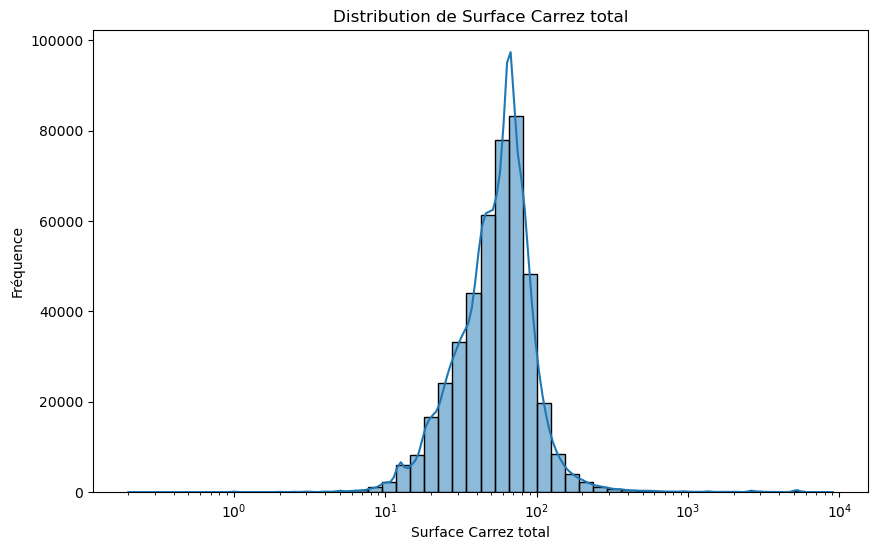

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supprimer les lignes avec des NaN dans les colonnes numériques
df_cleaned = df.dropna(subset = ['Surface Carrez total'])
# Filtrer les valeurs supérieures à zéro
df_positive = df_cleaned[df_cleaned['Surface Carrez total'] > 0]
# Distribution de Surface Carrez total
plt.figure(figsize=(10, 6))
sns.histplot(df_positive['Surface Carrez total'], bins=50, kde=True, log_scale=True)
plt.title(f'Distribution de Surface Carrez total')
plt.xlabel('Surface Carrez total')
plt.ylabel('Fréquence')
plt.show()


### Histo Valeur foncière

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


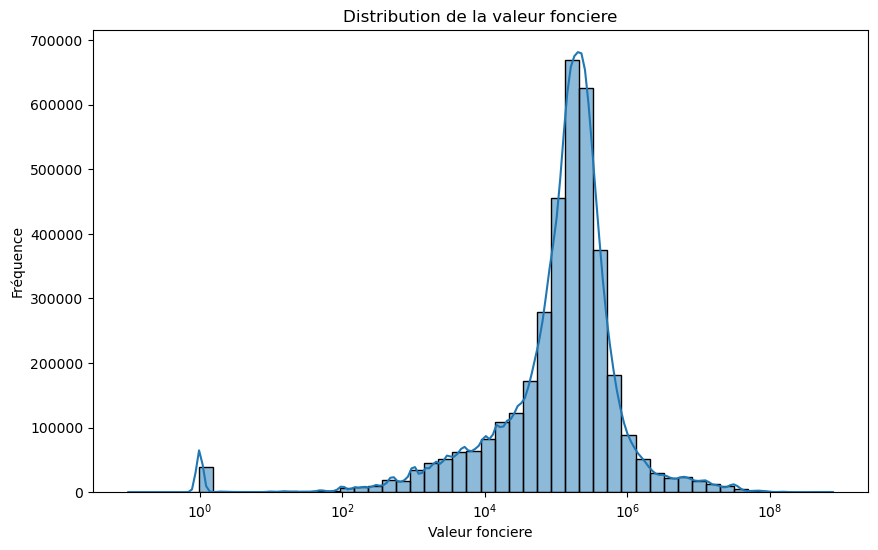

In [40]:
# Supprimer les lignes avec des NaN dans les colonnes numériques
df_cleaned1 = df.dropna(subset = ['Valeur fonciere'])
# Filtrer les valeurs supérieures à zéro
df_positive1 = df_cleaned1[df_cleaned1['Valeur fonciere'] > 0]
# Distribution des valeurs foncières
plt.figure(figsize=(10, 6))
sns.histplot(df_positive1['Valeur fonciere'], bins=50, kde=True, log_scale=True)
plt.title(f'Distribution de la valeur fonciere')
plt.xlabel('Valeur fonciere')
plt.ylabel('Fréquence')
plt.show()


### Histo Surface reelle bati

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


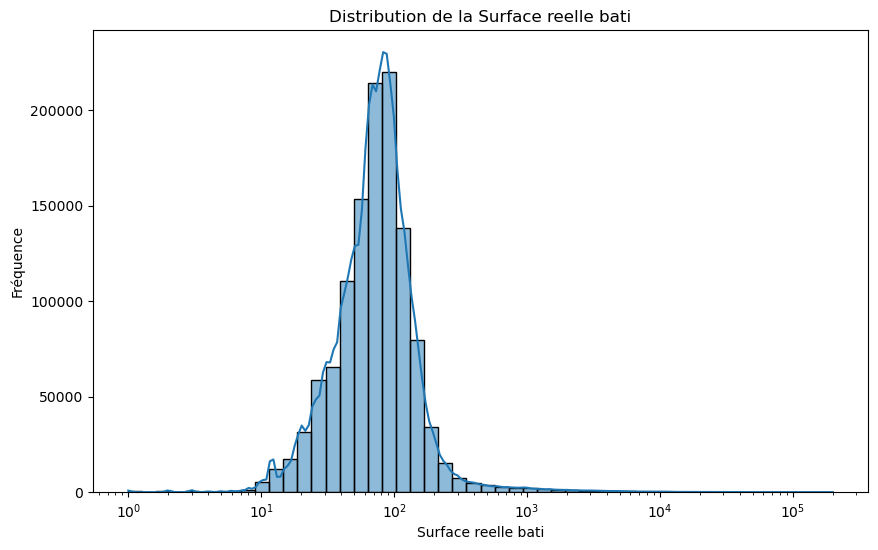

In [41]:
# Supprimer les lignes avec des NaN dans les colonnes numériques
df_cleaned2 = df.dropna(subset = ['Surface reelle bati'])
# Filtrer les valeurs supérieures à zéro
df_positive2 = df_cleaned2[df_cleaned2['Surface reelle bati'] > 0]
# Distribution des valeurs foncières
plt.figure(figsize=(10, 6))
sns.histplot(df_positive2['Surface reelle bati'], bins=50, kde=True, log_scale=True)
plt.title(f'Distribution de la Surface reelle bati')
plt.xlabel('Surface reelle bati')
plt.ylabel('Fréquence')
plt.show()

### Histo Nombre de pieces principales

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


TypeError: loop of ufunc does not support argument 0 of type float which has no callable sqrt method

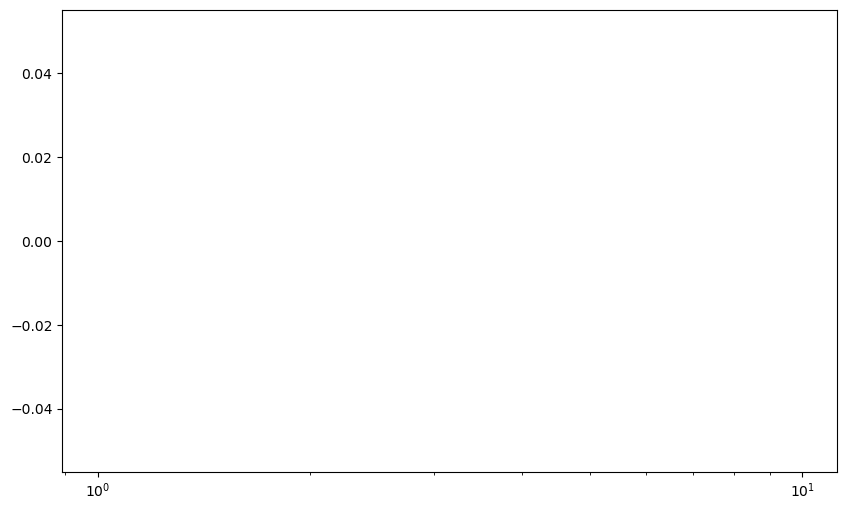

In [43]:
#CA MARCHE CHEZ JULIE DONC OKLM

#Supprimer les lignes avec des NaN dans les colonnes numériques
df_cleaned3 = df.dropna(subset = ['Nombre pieces principales'])
# Filtrer les valeurs supérieures à zéro
df_positive3 = df_cleaned3[df_cleaned3['Nombre pieces principales'] > 0]
# Distribution des valeurs foncières
plt.figure(figsize=(10, 6))
sns.histplot(df_positive3['Nombre pieces principales'], bins=50, kde=True, log_scale=True)
plt.title(f'Distribution de Nombre pieces principales')
plt.xlabel('Nombre pieces principales')
plt.ylabel('Fréquence')
plt.show()

### Histo surface terrain

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


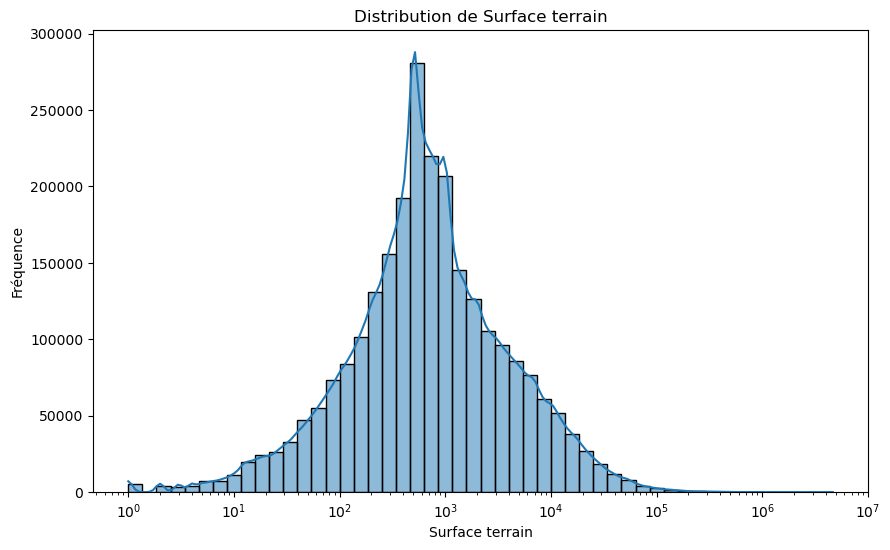

In [44]:
# Supprimer les lignes avec des NaN dans les colonnes numériques
df_cleaned4 = df.dropna(subset = ['Surface terrain'])
# Filtrer les valeurs supérieures à zéro
df_positive4 = df_cleaned4[df_cleaned4['Surface terrain'] > 0]
# Distribution des Surface terrain
plt.figure(figsize=(10, 6))
sns.histplot(df_positive4['Surface terrain'], bins=50, kde=True, log_scale=True)
plt.title(f'Distribution de Surface terrain')
plt.xlabel('Surface terrain')
plt.ylabel('Fréquence')
plt.show()

## Histo pour les variables catégorielles

#### Histo Date mutation

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


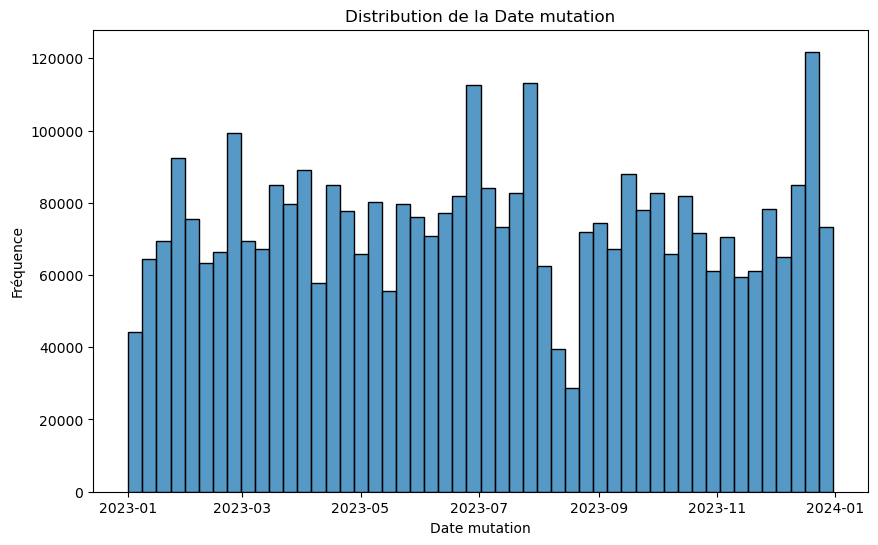

In [50]:
# Convertir la colonne 'Date mutation' en datetime avec le format jour/mois/année
df['Date mutation'] = pd.to_datetime(df['Date mutation'], format="%d/%m/%Y")

# Visualiser la distribution de la colonne 'Date mutation'
plt.figure(figsize=(10, 6))
sns.histplot(df['Date mutation'], bins=50, kde=False)
plt.title('Distribution de la Date mutation')
plt.xlabel('Date mutation')
plt.ylabel('Fréquence')
plt.show()

### Hist Nature mutation

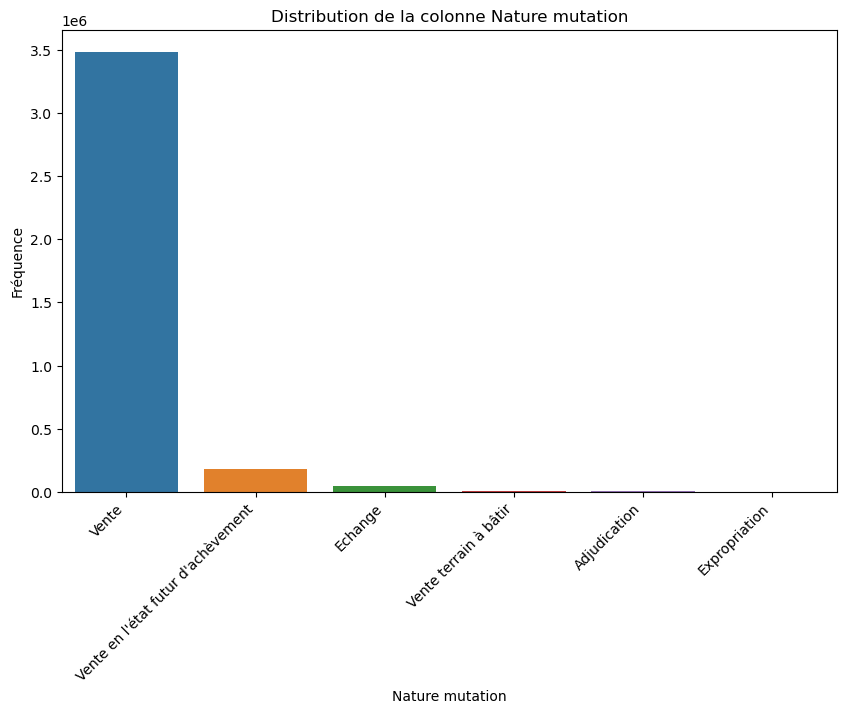

In [53]:
# Distribution de la colonne "Nature mutation" ordonnée par nombre de transactions
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Nature mutation', order=df['Nature mutation'].value_counts().index)
plt.title('Distribution de la colonne Nature mutation')
plt.xlabel('Nature mutation')
plt.ylabel('Fréquence')
plt.xticks(rotation=45, ha='right')  # Pour faire pivoter les étiquettes sur l'axe x
plt.show()

### Hist code département ile-de-france + normandie

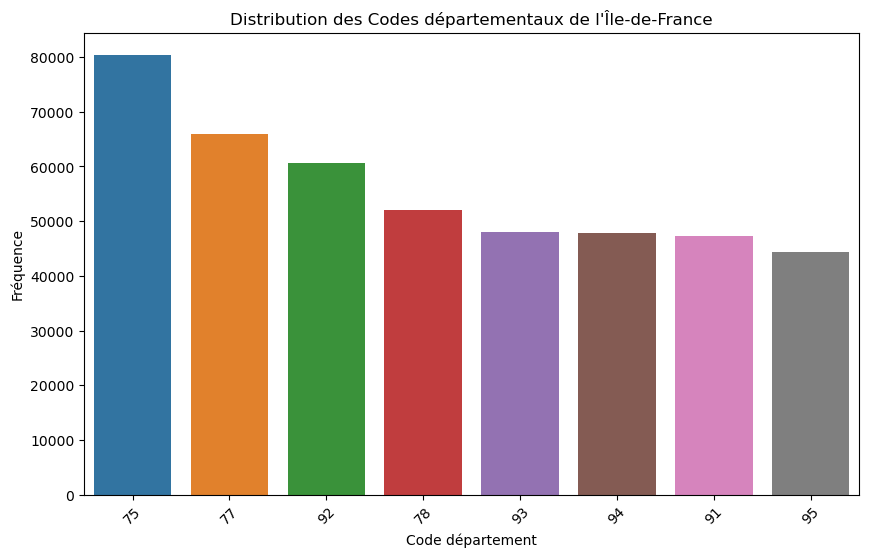

In [55]:
# Sélectionner uniquement les lignes avec des codes départementaux de l'Île-de-France
df_idf = df[df['Code departement'].isin(['75', '77', '78', '91', '92', '93', '94', '95'])]

# Afficher la distribution des codes départementaux de l'Île-de-France
plt.figure(figsize=(10, 6))
sns.countplot(data=df_idf, x='Code departement', order=df_idf['Code departement'].value_counts().index)
plt.title('Distribution des Codes départementaux de l\'Île-de-France')
plt.xlabel('Code département')
plt.ylabel('Fréquence')
plt.xticks(rotation=45)  # Rotation des étiquettes pour une meilleure lisibilité
plt.show()



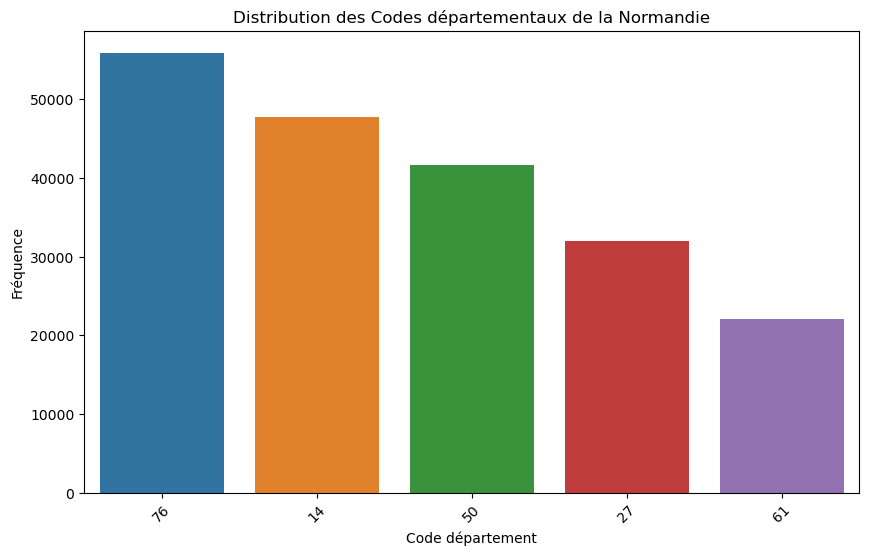

In [58]:
#Normandie
df_normandie = df[df['Code departement'].isin(['14', '27', '50', '61', '76'])]

# Afficher la distribution des codes départementaux de la Normandie
plt.figure(figsize=(10, 6))
sns.countplot(data=df_normandie, x='Code departement', order=df_normandie['Code departement'].value_counts().index)
plt.title('Distribution des Codes départementaux de la Normandie')
plt.xlabel('Code département')
plt.ylabel('Fréquence')
plt.xticks(rotation=45)  # Rotation des étiquettes pour une meilleure lisibilité
plt.show()

### Hist No Volume

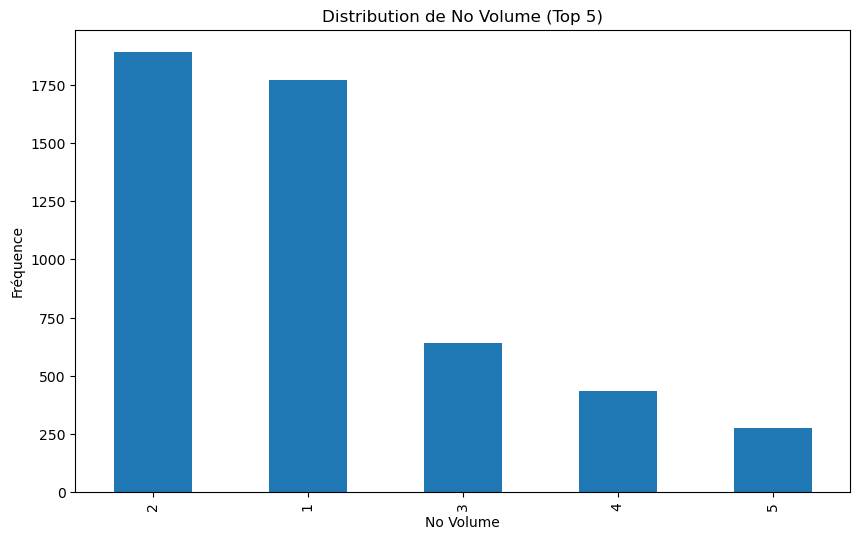

In [63]:
#Ici on a bcp trop de variable dans No Volume du coup on va récupérer les 5 plus fréquents 
# Compter le nombre de transactions pour chaque catégorie unique de la colonne 'No Volume'
transaction_counts = df['No Volume'].value_counts()

# Les 5 + fréquents
top_5_categories = transaction_counts.head(5)

# Créer le diagramme à barres
plt.figure(figsize=(10, 6))
top_5_categories.plot(kind='bar')
plt.title('Distribution de No Volume (Top 5)')
plt.xlabel('No Volume')
plt.ylabel('Fréquence')
plt.show()

### Hist type local

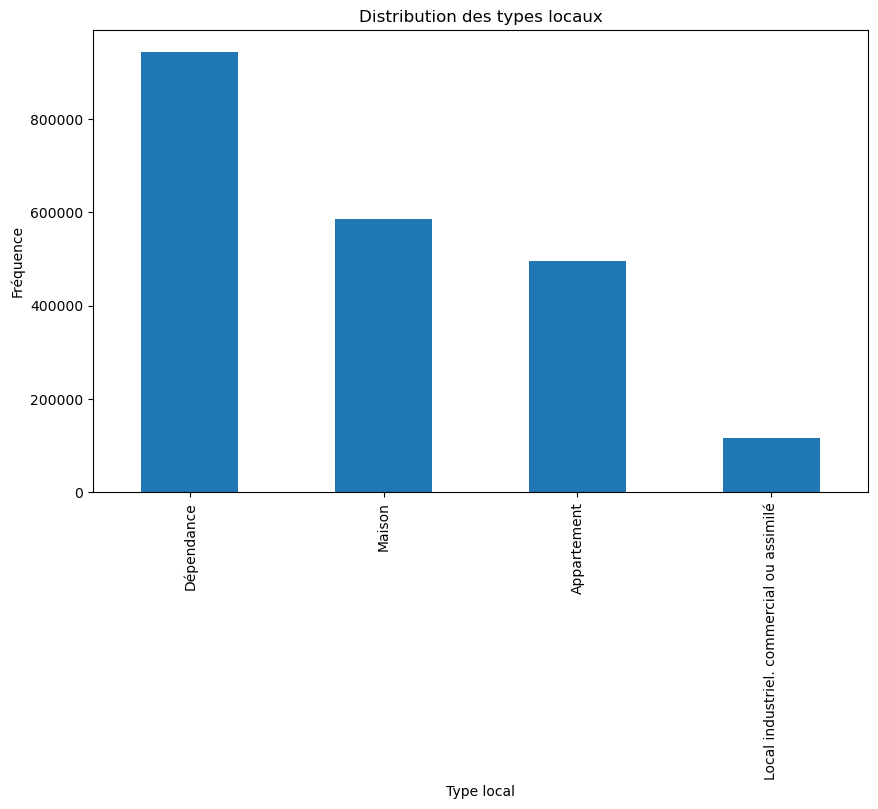

In [65]:
type_counts = df['Type local'].value_counts()

# Créer le diagramme à barres
plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar')
plt.title('Distribution des types locaux')
plt.xlabel('Type local')
plt.ylabel('Fréquence')
plt.show()

### Hist adresse

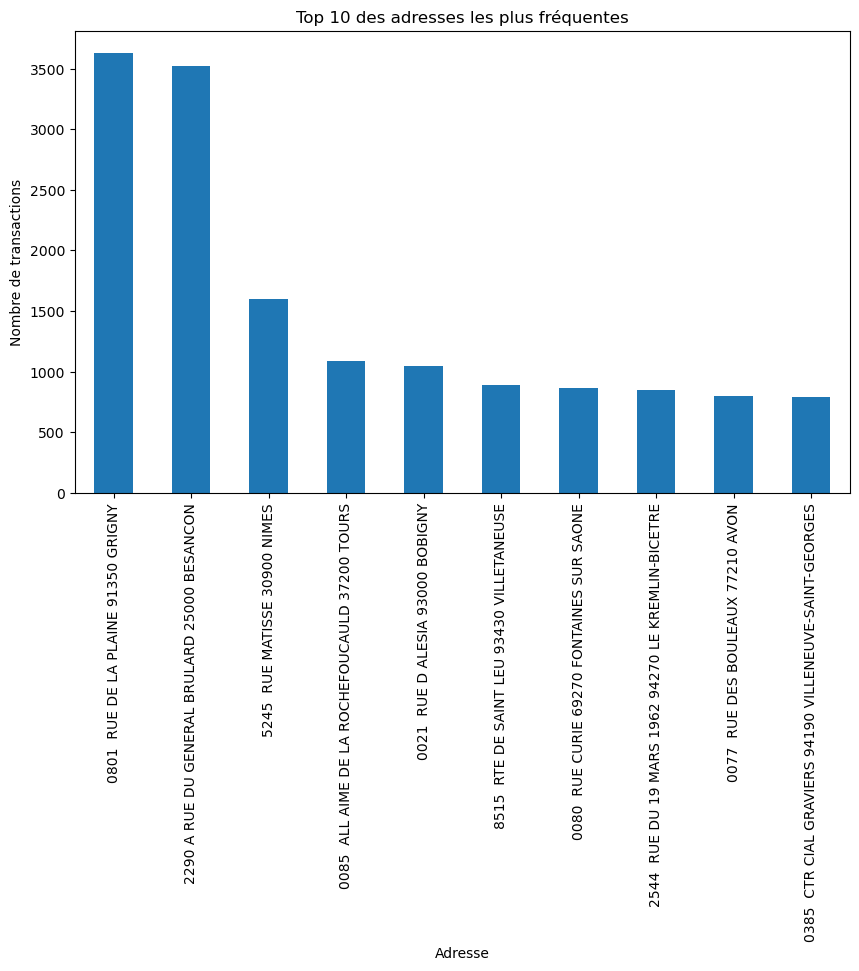

In [66]:


# Compter le nombre de transactions pour chaque adresse
adresse_counts = df['Adresse'].value_counts()

# Sélectionner les 10 adresses les plus fréquentes
top_10_adresses = adresse_counts.head(10)

# Créer le diagramme à barres
plt.figure(figsize=(10, 6))
top_10_adresses.plot(kind='bar')
plt.title('Top 10 des adresses les plus fréquentes')
plt.xlabel('Adresse')
plt.ylabel('Nombre de transactions')
plt.show()


# Interprétation des variables catégorielles avec les valeurs foncieres

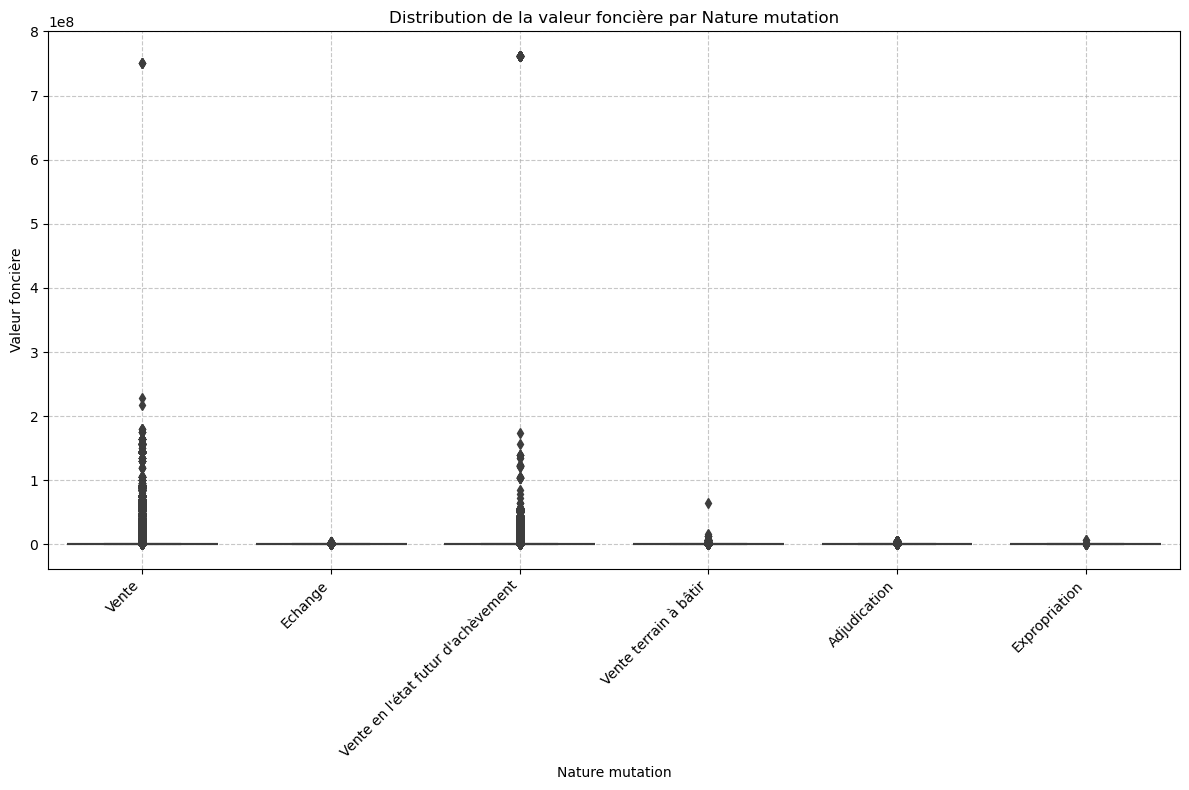

In [76]:
# Diagramme en boîte de la valeur foncière pour différentes catégories de Nature mutation
#plt.figure(figsize=(12, 8))
#sns.boxplot(data=df, x='Nature mutation', y='Valeur fonciere')
#plt.title('Distribution de la valeur foncière par Nature mutation')
#plt.xlabel('Nature mutation')
#plt.ylabel('Valeur foncière')
#plt.xticks(rotation=45)
#plt.show()

# Avec la grille
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Nature mutation', y='Valeur fonciere')
plt.title('Distribution de la valeur foncière par Nature mutation')
plt.xlabel('Nature mutation')
plt.ylabel('Valeur foncière')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)  # Ajout des grilles
plt.tight_layout()
plt.show()

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


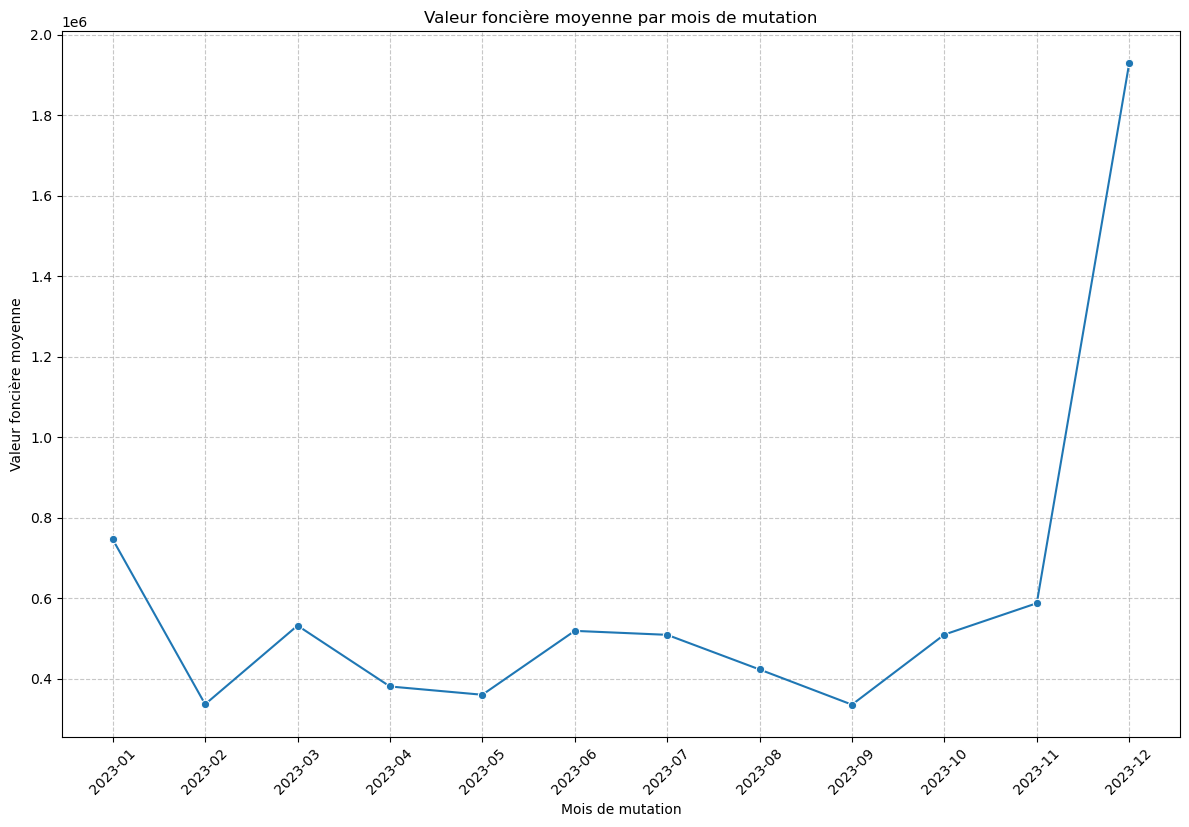

In [87]:
# Convertir 'date mutation' en datetime obligé de faire la conversion sinon ca ne marche pas 
#df['Date mutation'] = pd.to_datetime(df['Date mutation'], format='%d/%m/%Y')

# Graphique de dispersion de la valeur foncière en fonction de la date mutation
#plt.figure(figsize=(12, 8))
#sns.scatterplot(data=df, x='Date mutation', y='Valeur fonciere', alpha=0.5)
#plt.title('Valeur foncière en fonction de la date de mutation')
#plt.xlabel('Date de mutation')
#plt.ylabel('Valeur foncière')
#plt.grid(True, linestyle='--', alpha=0.7)  
#plt.tight_layout()
#plt.show()


# Convertir 'Date mutation' en datetime si ce n'est pas déjà fait
df['Date mutation'] = pd.to_datetime(df['Date mutation'], format='%d/%m/%Y')

# Extraire le mois et l'année
df['Mois mutation'] = df['Date mutation'].dt.to_period('M').astype(str)

# Calculer la moyenne de la valeur foncière par mois
df_monthly = df.groupby('Mois mutation')['Valeur fonciere'].mean().reset_index()

# Graphique de la valeur foncière moyenne par mois
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_monthly, x='Mois mutation', y='Valeur fonciere', marker='o')
plt.title('Valeur foncière moyenne par mois de mutation')
plt.xlabel('Mois de mutation')
plt.ylabel('Valeur foncière moyenne')
plt.grid(True, linestyle='--', alpha=0.7)  
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


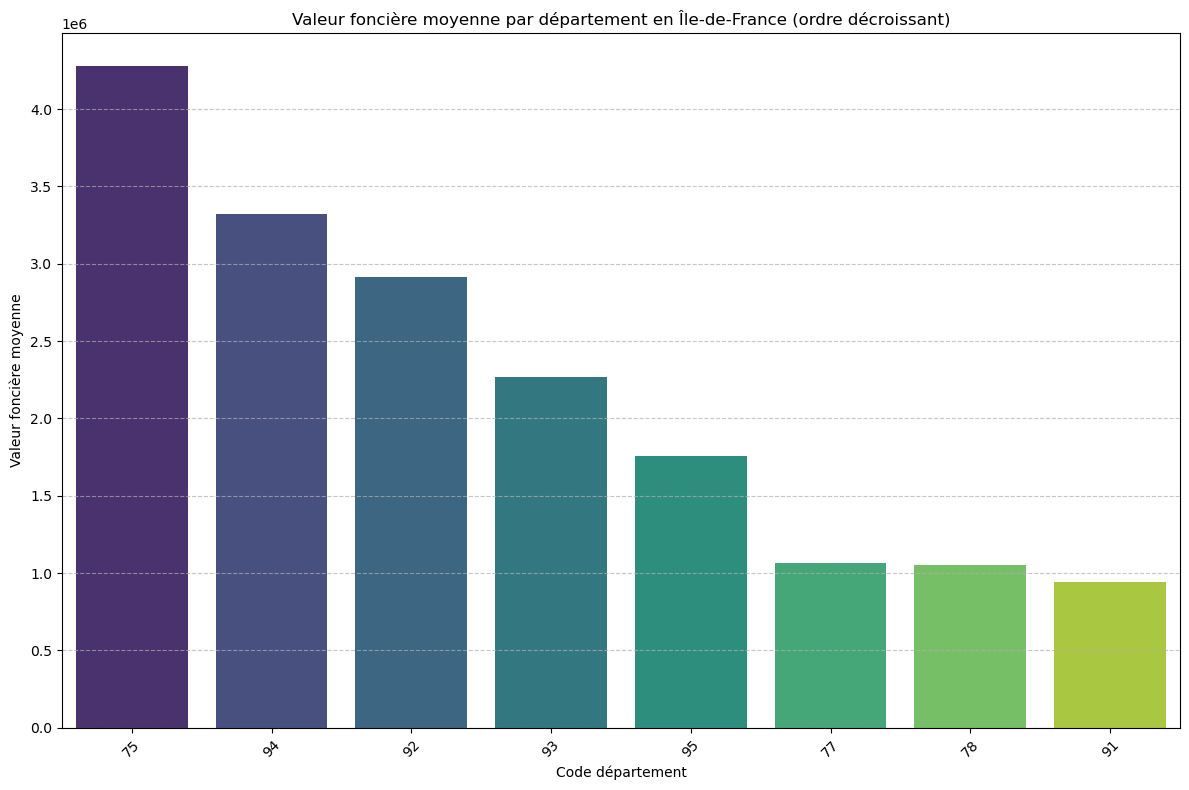

In [91]:
ile_de_france_departments = ['75', '77', '78', '91', '92', '93', '94', '95']
df_ile_de_france = df[df['Code departement'].isin(ile_de_france_departments)]

# Calculer la valeur foncière moyenne pour chaque code département
mean_value_by_department = df_ile_de_france.groupby('Code departement')['Valeur fonciere'].mean().reset_index()

# Trier le DataFrame par valeur foncière moyenne dans l'ordre décroissant
mean_value_by_department_sorted = mean_value_by_department.sort_values(by='Valeur fonciere', ascending=False)

# Créer un graphique à barres pour la valeur foncière moyenne par département
plt.figure(figsize=(12, 8))
sns.barplot(data=mean_value_by_department_sorted, x='Code departement', y='Valeur fonciere', palette='viridis')
plt.title('Valeur foncière moyenne par département en Île-de-France (ordre décroissant)')
plt.xlabel('Code département')
plt.ylabel('Valeur foncière moyenne')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

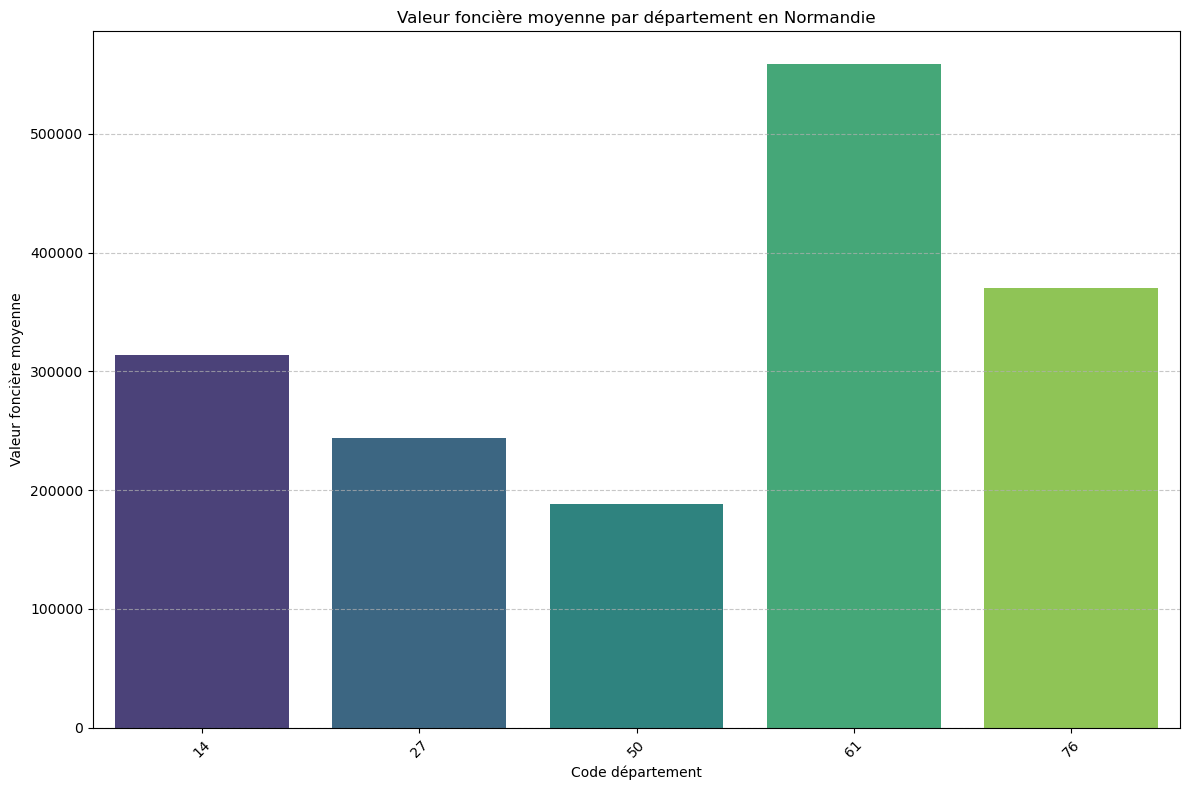

In [90]:
# Filtrer les données pour les départements de Normandie
normandie_departments = ['14', '27', '50', '61', '76']
df_normandie = df[df['Code departement'].isin(normandie_departments)]

# Calculer la valeur foncière moyenne pour chaque code département
mean_value_by_department = df_normandie.groupby('Code departement')['Valeur fonciere'].mean().reset_index()

# Créer un graphique à barres pour la valeur foncière moyenne par département
plt.figure(figsize=(12, 8))
sns.barplot(data=mean_value_by_department, x='Code departement', y='Valeur fonciere', palette='viridis')
plt.title('Valeur foncière moyenne par département en Normandie')
plt.xlabel('Code département')
plt.ylabel('Valeur foncière moyenne')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()